# DOCUMENTATION LINK - https://stocknewsapi.com/documentation

## We will need to install the requests library in Python if you haven't done so already

In [2]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We will need to securely store your API key. For the purpose of this example, let's say you've stored it in an environment variable.

In [3]:
import os
api_key = os.getenv('cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf')

'TSLA, GOOGL, META, MSFT, AAPL, NVDA, AMZN' - 01012020-06122023

*   TSLA
*   TSLA,GOOGL,META,MSFT,AAPL,NVDA,AMZN



# LETS FETCH THE DATA FOR OUR TICKERS
Company Ticker News (TSLA)

In [17]:
import pandas as pd
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re


def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=05012023-06012023&items=100&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

if data is not None:
    for item in data['data']:  # Change this line
        print(f"Company: {item['tickers']}")
        print(f"News Provider: {item['source_name']}")
        print(f"Date of Data: {item['date']}")
        print(f"Good or Bad Feeling: {item['sentiment']}")
        print(f"Title: {item['title']}")
        print(f"Article Text: {item['text']}")
        print("")
else:
    print("Failed to fetch data from the API.")


Company: ['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
News Provider: CNBC Television
Date of Data: Thu, 01 Jun 2023 19:23:33 -0400
Good or Bad Feeling: Positive
Title: Jim Cramer highlights the stock market's 'Magnificent Seven' outperforming stocks
Article Text: 'Mad Money' host Jim Cramer looks back at the Dow Jones best performers through May 2023.

Company: ['TSLA']
News Provider: Investors Business Daily
Date of Data: Thu, 01 Jun 2023 17:30:21 -0400
Good or Bad Feeling: Positive
Title: Tech Stocks Lead Stock Market Rally As Tesla Breaks Out; Pivotal Jobs Report Up Next
Article Text: Tech stocks led the stock market higher Thursday, as Tesla stock broke out past a buy point. A pivotal jobs report is up next Friday.

Company: ['F', 'TSLA']
News Provider: Yahoo Finance
Date of Data: Thu, 01 Jun 2023 16:45:19 -0400
Good or Bad Feeling: Positive
Title: Rivals Tesla and Ford join forces to expand EV charging
Article Text: Tesla and Ford have formed a new EV charging

# The below code is a Python dictionary containing information about a news article or video related to a stock. Identifies each key value.

In [5]:
# Define each key value
def fetch_data(api_key, tickers='TSLA', items=10):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&items=3&page=1&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

if data is not None:
    print(data['data'][0])  # Print the first item in the 'data' list
else:
    print("Failed to fetch data from the API.")


{'news_url': 'https://seekingalpha.com/article/4612781-tesla-charging-deals-some-win-some-lose', 'image_url': 'https://cdn.snapi.dev/images/v1/t/7/image-954558336-1942711.jpg', 'title': "Tesla's Charging Deals: Some Win, Some Lose", 'text': "Tesla has crafted deals with Ford, General Motors, and Rivian, allowing their electric vehicle customers to use Tesla's supercharger network. The deals could increase Tesla's revenue and reduce tech risks, but may also negatively impact sales due to the loss of an exclusive selling point. Non-Tesla charging infrastructure companies, such as Electrify America and ChargePoint, may face increased competition and headwinds due to these deals.", 'source_name': 'Seeking Alpha', 'date': 'Wed, 21 Jun 2023 11:12:27 -0400', 'topics': ['paylimitwall'], 'sentiment': 'Neutral', 'type': 'Article', 'tickers': ['TSLA']}


# Lets clean up the data with NLTK

In [6]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# In this code, the clean_text function is used to clean the text data before the sentiment analysis is performed. The cleaned text is then passed to the SentimentIntensityAnalyzer to get the sentiment score.

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove # symbols
    text = re.sub(r'\@\w+|\#','', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespace
    text = text.strip()
    # lowercasing
    text = text.lower()
    # tokenization
    text_tokens = word_tokenize(text)
    # remove stopwords
    text = [word for word in text_tokens if word not in stopwords.words('english')]
    # join words to form the original sentence
    text = ' '.join(text)
    return text

def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=05012023-06012023&items=100&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

sid = SentimentIntensityAnalyzer()

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        sentiment_score = sid.polarity_scores(cleaned_text)
        print(f"Company: {item['tickers']}")
        print(f"News Provider: {item['source_name']}")
        print(f"Date of Data: {item['date']}")
        print(f"Good or Bad Feeling: {item['sentiment']}")
        print(f"Title: {item['title']}")
        print(f"Article Text: {cleaned_text}")
        print(f"Sentiment Score: {sentiment_score}")
        print("")
else:
    print("Failed to fetch data from the API.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Company: ['AAPL', 'AMZN', 'GOOG', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']
News Provider: CNBC Television
Date of Data: Thu, 01 Jun 2023 19:23:33 -0400
Good or Bad Feeling: Positive
Title: Jim Cramer highlights the stock market's 'Magnificent Seven' outperforming stocks
Article Text: mad money host jim cramer looks back dow jones best performers may
Sentiment Score: {'neg': 0.184, 'neu': 0.575, 'pos': 0.241, 'compound': 0.25}

Company: ['TSLA']
News Provider: Investors Business Daily
Date of Data: Thu, 01 Jun 2023 17:30:21 -0400
Good or Bad Feeling: Positive
Title: Tech Stocks Lead Stock Market Rally As Tesla Breaks Out; Pivotal Jobs Report Up Next
Article Text: tech stocks led stock market higher thursday tesla stock broke past buy point pivotal jobs report next friday
Sentiment Score: {'neg': 0.141, 'neu': 0.859, 'pos': 0.0, 'compound': -0.4215}

Company: ['F', 'TSLA']
News Provider: Yahoo Finance
Date of Data: Thu, 01 Jun 2023 16:45:19 -0400
Good or Bad Feeling: Positive
Title: Riva

 # Adjusting the format to correctly reflect: '%a, %d %b %Y %H:%M:%S %z'.
- %a: Weekday as locale’s abbreviated name (e.g., Mon, Tue, Wed, etc.).
- %d: Day of the month as a zero-padded decimal number (e.g., 01, 02, ..., 31).
- %b: Month as locale’s abbreviated name (e.g., Jan, Feb, ..., Dec).
- %Y: Year with century as a decimal number (e.g., 2023).
- %H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 00, 01, ..., 23).
- %M: Minute as a zero-padded decimal number (e.g., 00, 01, ..., 59).
- %S: Second as a zero-padded decimal number (e.g., 00, 01, ..., 59).
- %z: UTC offset in the form +HHMM or -HHMM (empty string if the object is naive).

In [19]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove # symbols
    text = re.sub(r'\@\w+|\#','', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespace
    text = text.strip()
    # lowercasing
    text = text.lower()
    # tokenization
    text_tokens = word_tokenize(text)
    # remove stopwords
    text = [word for word in text_tokens if word not in stopwords.words('english')]
    # join words to form the original sentence
    text = ' '.join(text)
    return text

def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=05012023-06012023&items=100&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

sid = SentimentIntensityAnalyzer()

data_dict = {
    'Company': [],
    'News Provider': [],
    'Date of Data': [],
    'Good or Bad Feeling': [],
    'Title': [],
    'Article Text': [],
    'Sentiment Score': []
}

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        sentiment_score = sid.polarity_scores(cleaned_text)
        data_dict['Company'].append(item['tickers'])
        data_dict['News Provider'].append(item['source_name'])
        data_dict['Date of Data'].append(pd.to_datetime(item['date'], format='%a, %d %b %Y %H:%M:%S %z').date())
        data_dict['Good or Bad Feeling'].append(item['sentiment'])
        data_dict['Title'].append(item['title'])
        data_dict['Article Text'].append(cleaned_text)
        data_dict['Sentiment Score'].append(sentiment_score)

    df = pd.DataFrame(data_dict)
    print(df)
else:
    print("Failed to fetch data")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              Company  \
0   [AAPL, AMZN, GOOG, GOOGL, META, MSFT, NVDA, TSLA]   
1                                              [TSLA]   
2                                           [F, TSLA]   
3                                              [TSLA]   
4                                  [F, GM, NIO, TSLA]   
..                                                ...   
95                                          [F, TSLA]   
96                                          [F, TSLA]   
97                                          [F, TSLA]   
98                                             [TSLA]   
99                                          [F, TSLA]   

               News Provider Date of Data Good or Bad Feeling  \
0            CNBC Television   2023-06-01            Positive   
1   Investors Business Daily   2023-06-01            Positive   
2              Yahoo Finance   2023-06-01            Positive   
3              Seeking Alpha   2023-06-01            Ne

In [9]:
# PANDAS METHOD
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    text = text.lower()
    text_tokens = word_tokenize(text)
    text = [word for word in text_tokens if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=05012023-06012023&items=100&token={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
data = fetch_data(api_key)

if data is not None:
    df = pd.DataFrame(data['data'])
    df['date'] = pd.to_datetime(df['date'], format='%a, %d %b %Y %H:%M:%S %z').dt.date
    df['text'] = df['text'].apply(clean_text)
    df['sentiment_score'] = df['text'].apply(analyze_sentiment)
    df.rename(columns={'tickers': 'Company', 'source_name': 'News Provider', 'date': 'Date of Data', 'sentiment': 'Good or Bad Feeling', 'title': 'Title', 'text': 'Article Text'}, inplace=True)
    print(df)
else:
    print("Failed to fetch data")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             news_url  \
0         https://www.youtube.com/watch?v=4bJSK8bAjFQ   
1   https://www.investors.com/market-trend/the-big...   
2         https://www.youtube.com/watch?v=AZ8kFaO4eyc   
3   https://seekingalpha.com/article/4608853-price...   
4   https://www.marketwatch.com/story/u-s-car-sale...   
..                                                ...   
95  https://markets.businessinsider.com/news/stock...   
96  https://www.proactiveinvestors.com/companies/n...   
97        https://www.youtube.com/watch?v=yd23850h9zc   
98  https://www.barrons.com/articles/catl-ev-batte...   
99  https://247wallst.com/autos/2023/05/26/ford-fl...   

                                            image_url  \
0   https://cdn.snapi.dev/images/v1/o/q/jim-cramer...   
1   https://cdn.snapi.dev/images/v1/n/c/tsk8-19178...   
2   https://cdn.snapi.dev/images/v1/g/4/rivals-tes...   
3   https://cdn.snapi.dev/images/v1/e/h/image-1422...   
4   https://cdn.snapi.dev/imag

In [10]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove # symbols
    text = re.sub(r'\@\w+|\#','', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespace
    text = text.strip()
    # lowercasing
    text = text.lower()
    # tokenization
    text_tokens = word_tokenize(text)
    # remove stopwords
    text = [word for word in text_tokens if word not in stopwords.words('english')]
    # join words to form the original sentence
    text = ' '.join(text)
    return text

def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=01012020-06012023&items=100&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

sid = SentimentIntensityAnalyzer()

data_dict = {
    'Company': [],
    'News Provider': [],
    'Date of Data': [],
    'Good or Bad Feeling': [],
    'Title': [],
    'Article Text': [],
    'Sentiment Score': []
}

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        sentiment_score = sid.polarity_scores(cleaned_text)
        data_dict['Company'].append(item['tickers'])
        data_dict['News Provider'].append(item['source_name'])
        data_dict['Date of Data'].append(pd.to_datetime(item['date'], format='%a, %d %b %Y %H:%M:%S %z').date())
        data_dict['Good or Bad Feeling'].append(item['sentiment'])
        data_dict['Title'].append(item['title'])
        data_dict['Article Text'].append(cleaned_text)
        data_dict['Sentiment Score'].append(sentiment_score)

    df = pd.DataFrame(data_dict)

    # Display the first few rows of the DataFrame
    print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             Company  \
0  [AAPL, AMZN, GOOG, GOOGL, META, MSFT, NVDA, TSLA]   
1                                             [TSLA]   
2                                          [F, TSLA]   
3                                             [TSLA]   
4                                 [F, GM, NIO, TSLA]   

              News Provider Date of Data Good or Bad Feeling  \
0           CNBC Television   2023-06-01            Positive   
1  Investors Business Daily   2023-06-01            Positive   
2             Yahoo Finance   2023-06-01            Positive   
3             Seeking Alpha   2023-06-01            Negative   
4              Market Watch   2023-06-01            Negative   

                                               Title  \
0  Jim Cramer highlights the stock market's 'Magn...   
1  Tech Stocks Lead Stock Market Rally As Tesla B...   
2  Rivals Tesla and Ford join forces to expand EV...   
3           Price Wars: Tesla Loses The Margin Crown  

In [11]:
# Extract the compound sentiment scores
df['compound'] = df['Sentiment Score'].apply(lambda score: score['compound'])

# Display the first few rows of the DataFrame
print(df.head())


                                             Company  \
0  [AAPL, AMZN, GOOG, GOOGL, META, MSFT, NVDA, TSLA]   
1                                             [TSLA]   
2                                          [F, TSLA]   
3                                             [TSLA]   
4                                 [F, GM, NIO, TSLA]   

              News Provider Date of Data Good or Bad Feeling  \
0           CNBC Television   2023-06-01            Positive   
1  Investors Business Daily   2023-06-01            Positive   
2             Yahoo Finance   2023-06-01            Positive   
3             Seeking Alpha   2023-06-01            Negative   
4              Market Watch   2023-06-01            Negative   

                                               Title  \
0  Jim Cramer highlights the stock market's 'Magn...   
1  Tech Stocks Lead Stock Market Rally As Tesla B...   
2  Rivals Tesla and Ford join forces to expand EV...   
3           Price Wars: Tesla Loses The Margin Crown  

# WE HAVE INCLUDE SENTIMENT USING VADER
- Using Pre-Trained Model: VADER (Valence Aware Dictionary and sEntiment Reasoner), which is included in the nltk library.
- The sentiment analysis model provided by NLTK (VADER) has been trained on a large amount of data to learn how to predict sentiment. W are using this trained model to predict sentiment on your fetched data.


In this code, we first import the SentimentIntensityAnalyzer from nltk.sentiment. We then create an instance of SentimentIntensityAnalyzer called sia. In the fetch_data function, we use sia.polarity_scores to get the sentiment scores of the text. This returns a dictionary with four items: 'neg', 'neu', 'pos', and 'compound'. The 'compound' score is a single metric that represents the overall sentiment of the text, which ranges from -1 (most negative) to +1 (most positive).

# To append the fetched data into a CSV file, you can create a Pandas DataFrame from the data and then use the to_csv function with the mode='a' parameter, which stands for 'append'. We create a new DataFrame for each row and then concatenate it to the existing DataFrame.

- This script fetches stock news, preprocesses the text, performs sentiment analysis, and stores the results for further analysis or visualization.

In [12]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove # symbols
    text = re.sub(r'\@\w+|\#','', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespace
    text = text.strip()
    # lowercasing
    text = text.lower()
    # tokenization
    text_tokens = word_tokenize(text)
    # remove stopwords
    text = [word for word in text_tokens if word not in stopwords.words('english')]
    # join words to form the original sentence
    text = ' '.join(text)
    return text

def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=05012023-06012023&items=100&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

sid = SentimentIntensityAnalyzer()

df = pd.DataFrame()

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        sentiment_score = sid.polarity_scores(cleaned_text)
        new_row = pd.DataFrame({
            'Company': [item['tickers']],
            'News Provider': [item['source_name']],
            'Date of Data': [pd.to_datetime(item['date'], format='%a, %d %b %Y %H:%M:%S %z').date()],
            'Good or Bad Feeling': [item['sentiment']],
            'Title': [item['title']],
            'Article Text': [cleaned_text],
            'Sentiment Score': [sentiment_score]
        })
        df = pd.concat([df, new_row], ignore_index=True)

df.to_csv('sentiment_data.csv', mode='a', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# NOW LETS VISUALIZE OUR DATA
- Analyze sentiment scores over time: This can help us understand how the sentiment around a company has changed. We can plot a line graph with dates on the x-axis and sentiment scores on the y-axis.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


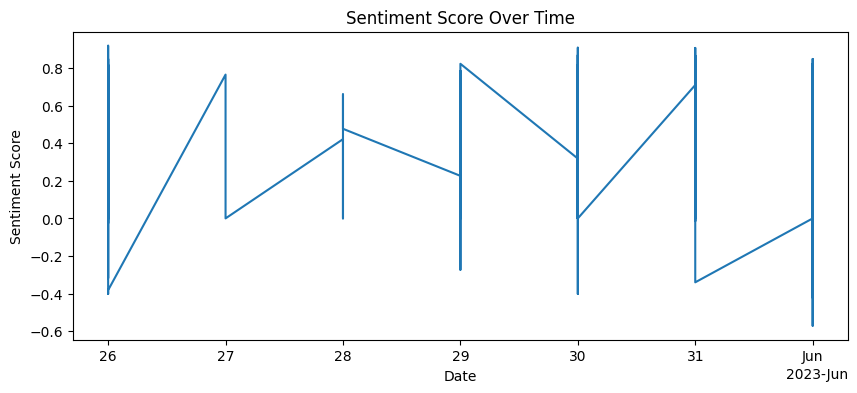

In [13]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove # symbols
    text = re.sub(r'\@\w+|\#','', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespace
    text = text.strip()
    # lowercasing
    text = text.lower()
    # tokenization
    text_tokens = word_tokenize(text)
    # remove stopwords
    text = [word for word in text_tokens if word not in stopwords.words('english')]
    # join words to form the original sentence
    text = ' '.join(text)
    return text

def fetch_data(api_key, tickers='TSLA', items=100):
    url = f'https://stocknewsapi.com/api/v1?tickers=TSLA&date=05012023-06012023&items=100&token=cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'
    response = requests.get(url)

    if response.status_code == 200:  # HTTP status code 200 means the request was successful
        return response.json()  # Parse the JSON data from the response
    else:
        return None  # Return None if the request was not successful

api_key = 'cq325rjbfrvd9g8wxy8iuzmgzrwd7yw3rcxjg3yf'  # Replace with your actual API key
data = fetch_data(api_key)

sid = SentimentIntensityAnalyzer()

df = pd.DataFrame()

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        sentiment_score = sid.polarity_scores(cleaned_text)
        new_row = pd.DataFrame({
            'Company': [item['tickers']],
            'News Provider': [item['source_name']],
            'Date of Data': [pd.to_datetime(item['date'], format='%a, %d %b %Y %H:%M:%S %z').date()],
            'Good or Bad Feeling': [item['sentiment']],
            'Title': [item['title']],
            'Article Text': [cleaned_text],
            'Sentiment Score': [sentiment_score['compound']]  # Use compound score for overall sentiment
        })
        df = pd.concat([df, new_row], ignore_index=True)

df.to_csv('sentiment_data.csv', mode='a', index=False)

# Plot sentiment scores over time
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df['Date of Data'], df['Sentiment Score'])

# Set the locator
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')
plt.show()


# In this code, AutoDateLocator is used to automatically choose the best date tick locations.
# The minticks and maxticks parameters are used to specify the minimum and maximum number of ticks.
# The ConciseDateFormatter is used to represent the dates in a concise manner.
# The major ticks of the x-axis are then set to use this locator and formatter.


# Word cloud visualization: This can help us understand the most frequently used words in the news articles. Words that appear more frequently will be larger in the word cloud.

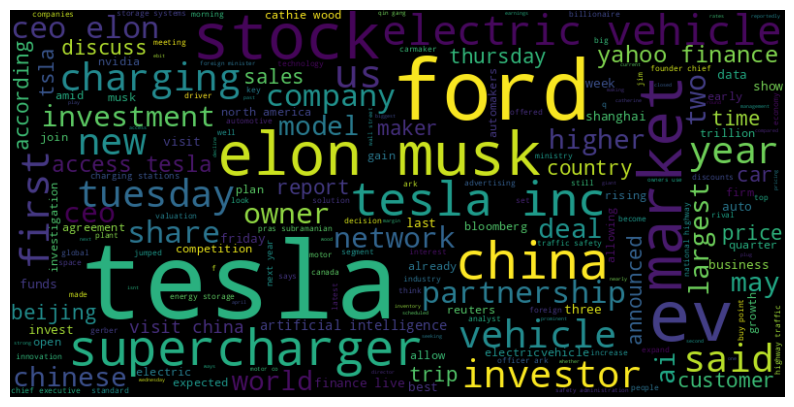

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ... rest of your code ...

all_text = ''  # This will hold all of the text from the articles

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        all_text += ' ' + cleaned_text  # Add the cleaned text to all_text

    # Create and display the word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


# Compare sentiment scores between different news providers: This can show us if some news providers have a more positive or negative sentiment towards the company. We can use a bar chart for this.

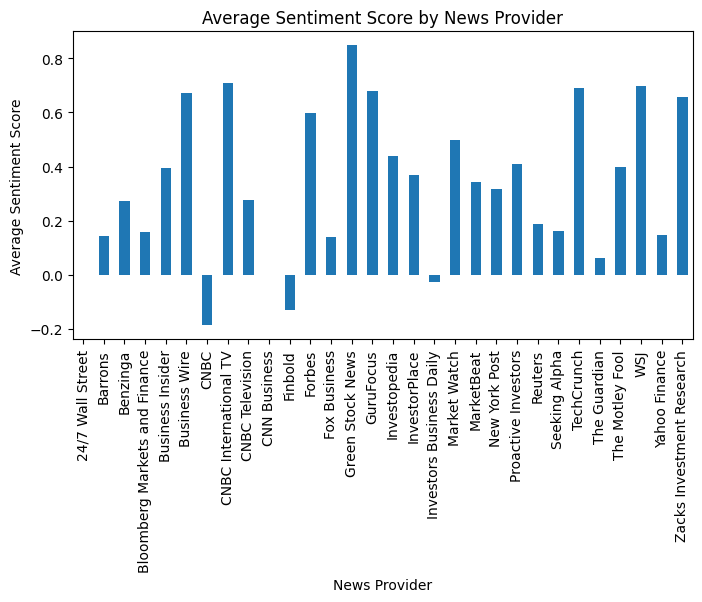

In [15]:
import matplotlib.pyplot as plt

# ... rest of your code ...

if data is not None:
    for item in data['data']:  # Change this line
        cleaned_text = clean_text(item['text'])
        sentiment_score = sid.polarity_scores(cleaned_text)
        new_row = pd.DataFrame({
            'Company': [item['tickers']],
            'News Provider': [item['source_name']],
            'Date of Data': [pd.to_datetime(item['date'], format='%a, %d %b %Y %H:%M:%S %z').date()],
            'Good or Bad Feeling': [item['sentiment']],
            'Title': [item['title']],
            'Article Text': [cleaned_text],
            'Sentiment Score': [sentiment_score['compound']]  # Use compound score for overall sentiment
        })
        df = pd.concat([df, new_row], ignore_index=True)

# Group by news provider and calculate average sentiment score
provider_sentiment = df.groupby('News Provider')['Sentiment Score'].mean()

# Plot the average sentiment scores
provider_sentiment.plot(kind='bar', figsize=(8,4))
plt.xlabel('News Provider')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by News Provider')
plt.show()


# Analyze the distribution of sentiment scores: This can give us an idea of whether the sentiment is generally positive, negative, or neutral. We can use a histogram for this.

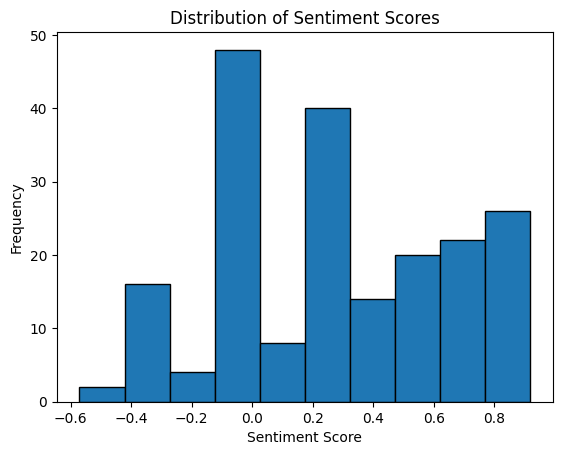

In [16]:
import matplotlib.pyplot as plt

# Assuming 'Sentiment Score' is a column in your DataFrame df
sentiment_scores = df['Sentiment Score']

plt.hist(sentiment_scores, bins=10, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()
